In [19]:
# -*- coding: utf-8 -*-
#Imortation des bibliothèques pour l'analyse des données
import pandas as pd
import numpy as np
import matplotlib as plt

In [20]:
# Chargement des datas
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_2066/2861356634.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


In [21]:
#calcul du nombre de ligne et de colonne dans le dataset
print(data.shape)


(101276, 37)


In [22]:
#Affichage des 5 premières et 5 dernières lignes du dataset
data.head


<bound method NDFrame.head of        Report Number Local Case Number                Agency Name  \
0        MCP1123002M         190010046   Montgomery County Police   
1        MCP21610009          16028039   Montgomery County Police   
2        MCP2790000P          15041420                 MONTGOMERY   
3        MCP3378000J         230051006   Montgomery County Police   
4         DD5659000H         230049130  Rockville Police Departme   
...              ...               ...                        ...   
101271   MCP23720066         240027904                 MONTGOMERY   
101272   MCP2513003P         240014218                 MONTGOMERY   
101273    DM85140017         240027843                     TAKOMA   
101274   MCP3379000V         240022598                 MONTGOMERY   
101275   MCP3148006F         240026585                 MONTGOMERY   

             ACRS Report Type         Crash Date/Time Hit/Run  \
0                Injury Crash  03/04/2019 08:41:00 AM      No   
1       Pro

In [23]:
# Choix des colonnes à utiliser pour l'analyse
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

In [24]:
df.shape
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Collision Type', 'Related Non-Motorist', 'At Fault',
       'First Harmful Event', 'Second Harmful Event', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [25]:
df.describe()
df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Hit/Run', 'Route Type',
       'Lane Direction', 'Lane Type', 'Number of Lanes', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Collision Type', 'Related Non-Motorist', 'At Fault',
       'First Harmful Event', 'Second Harmful Event', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_2066/3598701326.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


<Axes: xlabel='Year'>

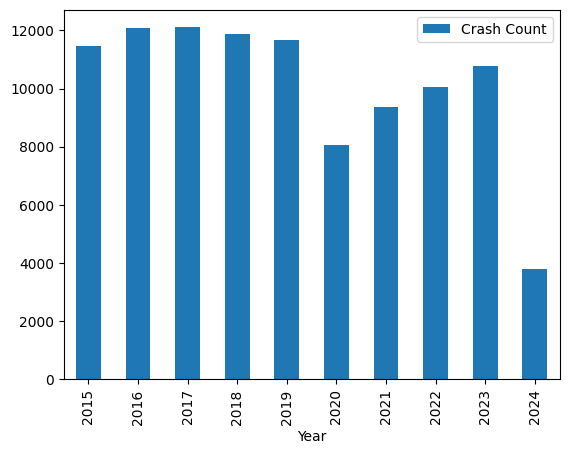

In [26]:
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
df = data

# création d'un nouveau jeu de données avec la colonne date qui regroupe les années de Crash Date/Time et qui additionne le nombre de crash par année
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df_yearly_crashes = df.groupby('Year').size().reset_index(name='Crash Count')
df_yearly_crashes.head()

#nombre totale d'accidents par année
df_yearly_crashes.plot(x='Year', y='Crash Count', kind='bar')


<Axes: ylabel='count'>

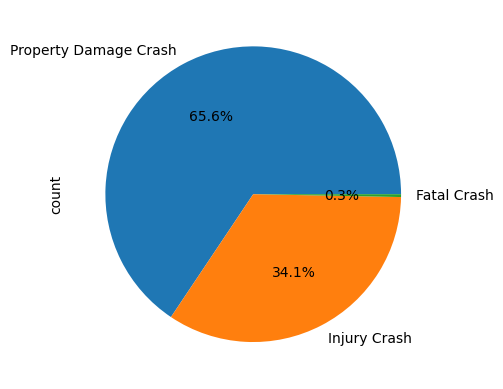

In [27]:
#Pourcentage de chaque type de crash
df['ACRS Report Type'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Hour'>

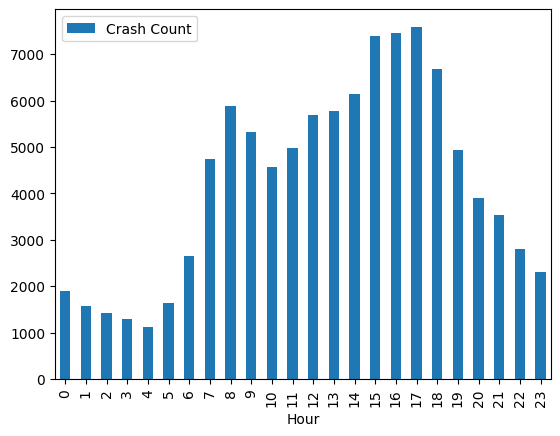

In [28]:
#Histogramme du nombre de crash par heure et par année

df['Hour'] = pd.to_datetime(df['Crash Date/Time']).dt.hour
df_hourly_crashes = df.groupby('Hour').size().reset_index(name='Crash Count')
df_hourly_crashes.plot(x='Hour', y='Crash Count', kind='bar')



<Axes: xlabel='Month'>

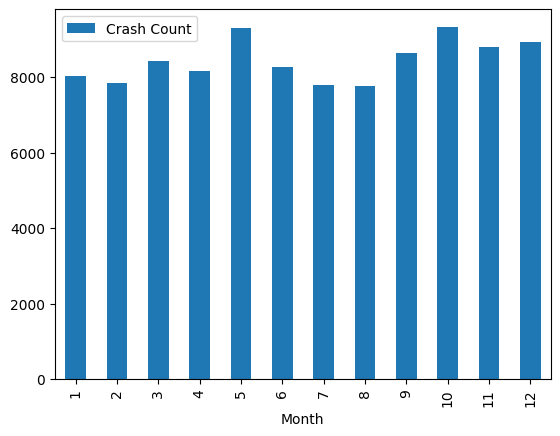

In [29]:
#Histogramme du nombre de crash par mois et par année
df['Month'] = pd.to_datetime(df['Crash Date/Time']).dt.month
df_monthly_crashes = df.groupby('Month').size().reset_index(name='Crash Count')
df_monthly_crashes.plot(x='Month', y='Crash Count', kind='bar')


In [30]:

data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]

df.head()


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_2066/3750903340.py:1: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')


,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Lane Direction,Lane Type,Number of Lanes,Weather,Surface Condition,Light,...,Driver Substance Abuse,Non-Motorist Substance Abuse,Collision Type,Related Non-Motorist,At Fault,First Harmful Event,Second Harmful Event,Latitude,Longitude,Location
0,Injury Crash,03/04/2019 08:41:00 AM,No,Maryland (State),West,NaN,2,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SAME DIR REAR END,NaN,DRIVER,OTHER VEHICLE,NaN,39.113113,-77.057592,"(39.11311333, -77.05759167)"
1,Property Damage Crash,06/04/2016 07:14:00 PM,Yes,County,East,NaN,1,CLEAR,DRY,DAYLIGHT,...,UNKNOWN,NaN,OTHER,NaN,DRIVER,PARKED VEHICLE,OTHER VEHICLE,38.982443,-77.079235,"(38.98244333, -77.079235)"
2,Property Damage Crash,08/18/2015 11:00:00 PM,No,County,South,NaN,2,CLEAR,DRY,DARK LIGHTS ON,...,NONE DETECTED,NaN,OPPOSITE DIRECTION SIDESWIPE,NaN,UNKNOWN,PARKED VEHICLE,NaN,39.189845,-77.230325,"(39.189845, -77.230325)"
3,Injury Crash,08/24/2023 07:46:00 AM,No,Maryland (State),West,NaN,4,CLOUDY,DRY,DAYLIGHT,...,NONE DETECTED,NaN,SINGLE VEHICLE,NaN,DRIVER,NaN,NaN,39.041698,-77.050125,"(39.04169833, -77.050125)"
4,Property Damage Crash,08/12/2023 04:28:00 PM,Yes,NaN,South,NaN,3,NaN,DRY,NaN,...,NaN,NaN,SAME DIRECTION SIDESWIPE,NaN,DRIVER,OTHER VEHICLE,OTHER VEHICLE,39.084720,-77.148200,"(39.08472, -77.1482)"


In [31]:
#création d'une map avec les coordonnées des accidents et leur type de collision
import folium
from folium import plugins

#mise sur la map des points de coordonnées des accidents
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)


for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)
    

map

In [32]:
# map des accident par type de collision et sur l'année 2019
df = data
df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2019]



map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

for i in range(0, min(1000, len(df))):
    if i >= len(df):
        break
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']], popup=df.iloc[i]['Collision Type']).add_to(map)

map

In [33]:
#création d'une heatmap avec les coordonnées des accidents
from folium.plugins import HeatMap

map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map

In [34]:
#création d'une heatmap avec les coordonnées des accidents sur l'année 2019 uniquement
map = folium.Map(location=[38.9072, -77.0369], zoom_start=11)

heat_df = df_2019[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(map)

map


NameError: name 'df_2019' is not defined

In [ ]:
#récupération des données du CSV
data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')

#création d'un dataframe avec les colonnes qui nous intéressent
colonnes = ['ACRS Report Type','Crash Date/Time', 'Hit/Run', 'Route Type', 'Lane Direction',
    'Lane Type', 'Number of Lanes', 'Weather', 'Surface Condition', 'Light',
    'Traffic Control', 'Driver Substance Abuse',
    'Non-Motorist Substance Abuse', 'Collision Type', 'Related Non-Motorist',
    'At Fault', 'First Harmful Event', 'Second Harmful Event', 'Latitude',
    'Longitude', 'Location']
df = data[colonnes]


#création d'un jeux de données sur l'année 2020 uniquement


df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year
df = df[df['Year'] == 2018]

df.head()
df.shape


/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_57117/3498950008.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Incidents_Data.csv')
/var/folders/z3/l2fngtm57qb349dkh5432_xw0000gn/T/ipykernel_57117/3498950008.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Crash Date/Time']).dt.year


(11869, 22)

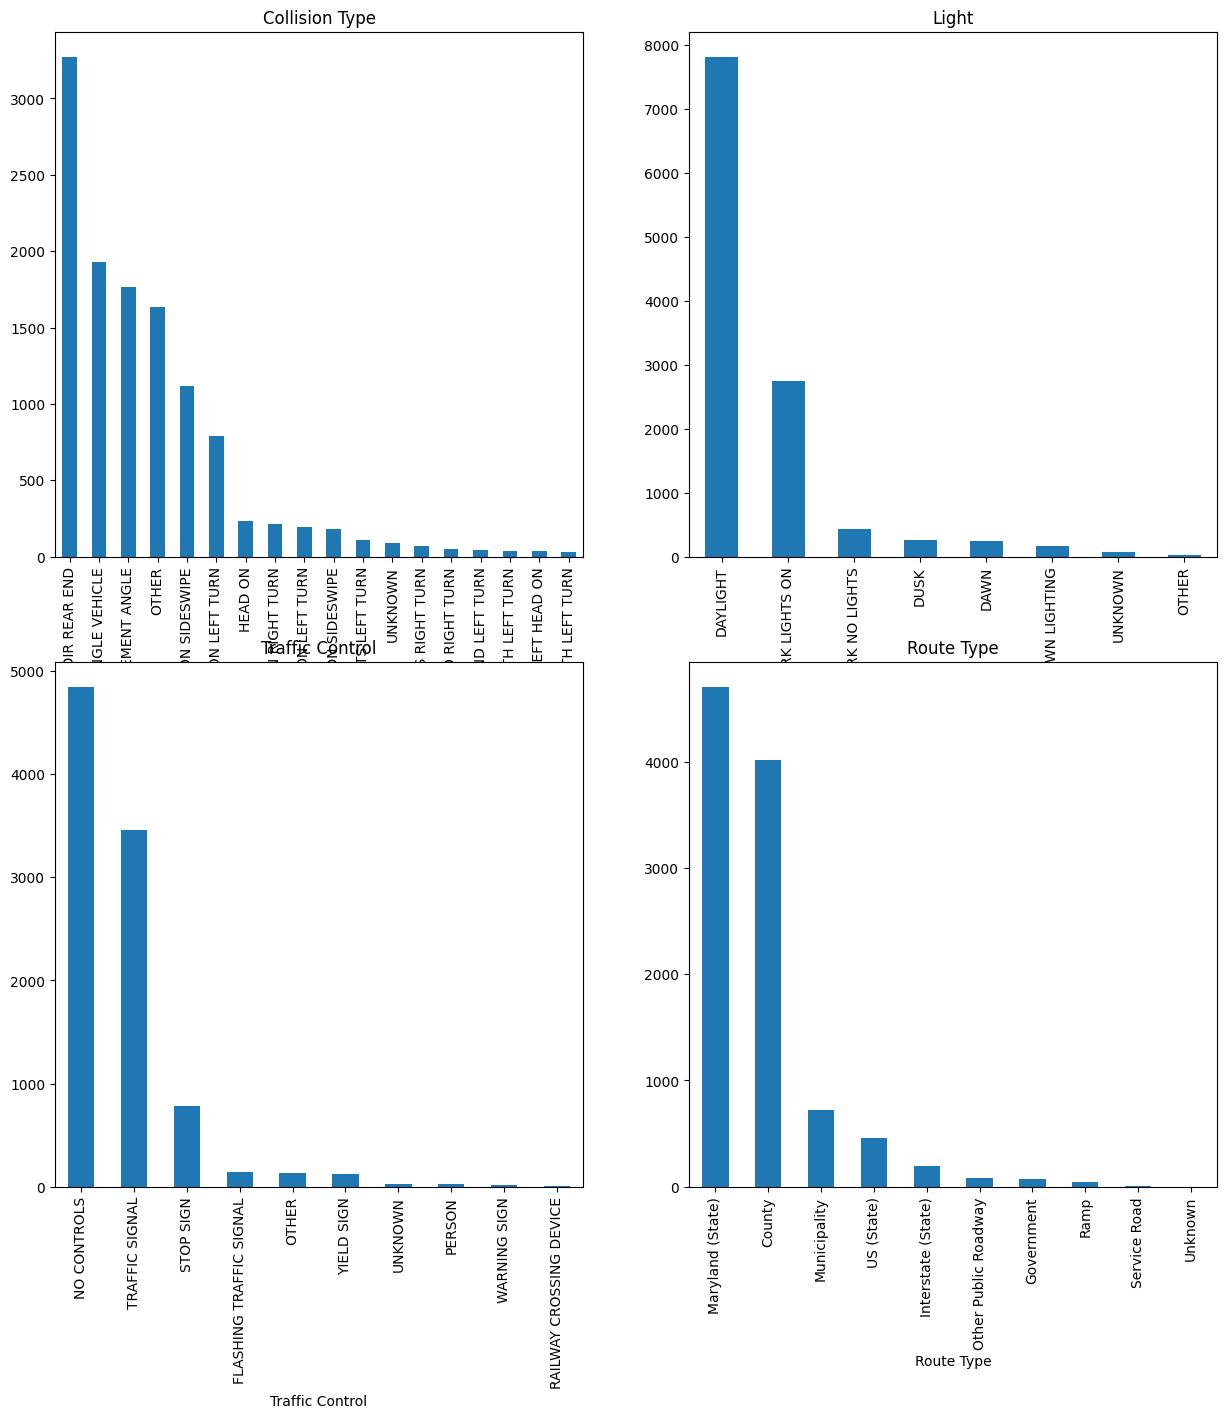

In [ ]:
#création d'un graphique de 4 figures différentes avec les accidents par type de collision, par type de lumière, par type de trafic et par type de route
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

df['Collision Type'].value_counts().plot(kind='bar', ax=axs[0, 0], title='Collision Type')
df['Light'].value_counts().plot(kind='bar', ax=axs[0, 1], title='Light')
df['Traffic Control'].value_counts().plot(kind='bar', ax=axs[1, 0], title='Traffic Control')
df['Route Type'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Route Type')

plt.show()


In [36]:
#création d'un graphique sur le type de colision par temps météorologique

fig, axs = plt.subplots(1, 1, figsize=(15, 15))

df.groupby(['Weather', 'Collision Type']).size().unstack().plot(kind='bar', stacked=True, ax=axs)


plt.show()



AttributeError: module 'matplotlib' has no attribute 'subplots'